In [130]:
import numpy as np
import matplotlib.pyplot as plt
import phoebe
from IPython.display import display, Math
phoebe.devel_off()
# phoebe.interactive_checks_off()
# phoebe.interactive_constraints_off()
# phoebe.multiprocessing_on()
# phoebe.mpi_off()
%matplotlib inline

# With GPs - DP + RBF

V: DotProduct(sigma_0=0.0198) + RBF(length_scale=71)

B: DotProduct(sigma_0=0.0267) + RBF(length_scale=79.4)

In [131]:
b = phoebe.load('bundles/pre_gps.bundle')

In [132]:
b.set_value('pblum_mode@lc02', 'dataset-coupled')
b.set_value('pblum_mode@lc01', 'component-coupled')

In [133]:
print(b['pblum*'])

ParameterSet: 9 parameters
          pblum_mode@lc01@dataset: component-coupled
     pblum_component@lc01@dataset: primary
       pblum@primary@lc01@dataset: 12.51134083495062 W
          pblum_mode@lc02@dataset: dataset-coupled
       pblum_dataset@lc02@dataset: lc01
   pblum@lc01@sample_init@dist...: <distl.gaussian loc=12.51134083495062 scale=0.016649769661684743 unit=W>
   pblum@lc02@sample_init@dist...: <distl.gaussian loc=12.444518749025917 scale=0.015145184148570578 unit=W>
   pblum@lc01@upriors@distribu...: <distl.uniform low=5.0 high=20.0 unit=W>
   pblum@lc02@upriors@distribu...: <distl.uniform low=5.0 high=20.0 unit=W>


In [134]:
b.add_gaussian_process('sklearn', kernel='dot_product', dataset='lc01', feature='gp1_dp')
b.add_gaussian_process('sklearn', kernel='dot_product', dataset='lc02', feature='gp2_dp')
b.add_gaussian_process('sklearn', kernel='rbf', dataset='lc01', feature='gp1_rbf')
b.add_gaussian_process('sklearn', kernel='rbf', dataset='lc02', feature='gp2_rbf')

b.set_value('sigma_0', feature='gp1_dp', value=0.0198)
b.set_value('sigma_0', feature='gp2_dp', value=0.0267)
b.set_value('length_scale', feature='gp1_rbf', value=71.0)
b.set_value('length_scale', feature='gp2_rbf', value=79.4)

In [135]:
b.run_compute(use_server='terra', model='init_gps')

# crimpl: ssh terra "ls -d ~/crimpl/crimpl-job-*"
# crimpl: ssh terra "ls -d ~/crimpl/crimpl-job-*"
# crimpl: ssh terra "pwd"
# crimpl: ssh terra "ls /home/users/angela/crimpl/crimpl-job-2022.05.24-16.16.26/*"
# crimpl: ssh terra "source ~/crimpl/exportpath.sh; conda -V"
# crimpl: ssh terra "source ~/crimpl/exportpath.sh; conda info --envs"
# crimpl: ssh terra "ls -d ~/crimpl/crimpl-envs/*"
# crimpl: ssh terra "ls -d ~/crimpl/crimpl-job-2022.05.24-16.16.26/crimpl-envs/*"
# crimpl: ssh terra "source ~/crimpl/exportpath.sh; mkdir -p /home/users/angela/crimpl/crimpl-job-2022.05.24-16.16.26"
# crimpl: scp crimpl_submit_script.sh /Users/angela/Documents/WORK/PHOETTING/phoetting-paper/FINAL_NOTEBOOKS_RESULTS/_tccqjuNgfmqKaQPjqKBdFkNumdevad.py terra:/home/users/angela/crimpl/crimpl-job-2022.05.24-16.16.26/
# crimpl: ssh terra "source ~/crimpl/exportpath.sh; echo '_tccqjuNgfmqKaQPjqKBdFkNumdevad.py' >> /home/users/angela/crimpl/crimpl-job-2022.05.24-16.16.26/crimpl-input-files.list"
# crimpl: 

<ParameterSet: 13 parameters | kinds: lc, rv>

/Users/angela/miniconda3/envs/phoebe_2.4/lib/python3.9/site-packages/phoebe/dependencies/autofig/call.py:1305: UserWarning: You passed a edgecolor/edgecolors ('none') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  artist = ax.scatter(*datapoint,
/Users/angela/miniconda3/envs/phoebe_2.4/lib/python3.9/site-packages/phoebe/dependencies/autofig/call.py:1305: UserWarning: You passed a edgecolor/edgecolors ('none') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  artist = ax.scatter(*datapoint,


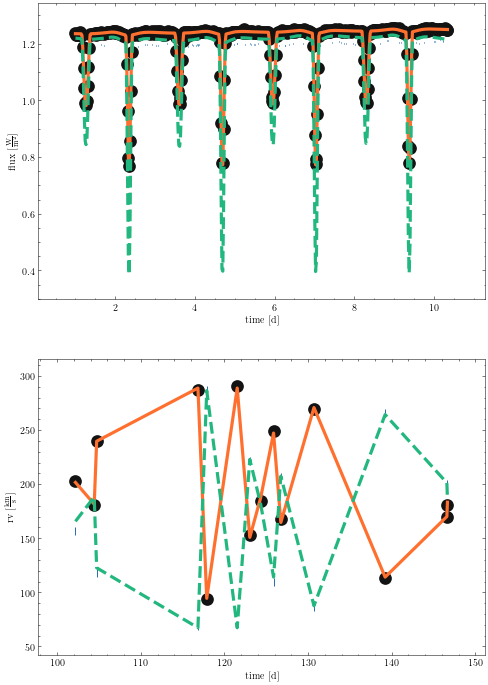

(<autofig.figure.Figure | 2 axes | 8 call(s)>,
 <Figure size 576x864 with 2 Axes>)

In [136]:
b.plot(['dataset', 'model'], model='init_gps', show=True)

In [6]:
b.add_solver('sampler.emcee', solver='mcmc_gps',
              init_from=['sample_init'],
              priors=['upriors',], 
              compute='phoebe01', nwalkers=96, niters=5000, progress_every_niters=10)

<ParameterSet: 17 parameters | qualifiers: burnin_factor, continue_from, priors, compute, nwalkers, comments, niters, nlags_factor, continue_from_iter, expose_failed, progress_every_niters, use_server, init_from_requires, thin_factor, init_from, priors_combine, init_from_combine>

In [7]:
b.run_solver(solver='mcmc_gps', use_server='terra', solution = 'mcmc_gps_solution', detach=True)

# crimpl: ssh terra "ls -d ~/crimpl/crimpl-job-*"
# crimpl: ssh terra "ls -d ~/crimpl/crimpl-job-*"
# crimpl: ssh terra "pwd"
# crimpl: ssh terra "ls /home/users/angela/crimpl/crimpl-job-2022.05.15-20.12.04/*"
# crimpl: ssh terra "source ~/crimpl/exportpath.sh; conda -V"
# crimpl: ssh terra "source ~/crimpl/exportpath.sh; conda info --envs"
# crimpl: ssh terra "ls -d ~/crimpl/crimpl-envs/*"
# crimpl: ssh terra "ls -d ~/crimpl/crimpl-job-2022.05.15-20.12.04/crimpl-envs/*"
# crimpl: ssh terra "source ~/crimpl/exportpath.sh; mkdir -p /home/users/angela/crimpl/crimpl-job-2022.05.15-20.12.04"
# crimpl: scp crimpl_submit_script.sh /Users/angela/Documents/WORK/PHOETTING/phoetting-paper/FINAL_NOTEBOOKS_RESULTS/_QoWmauRQBuxgHrQlxIAPfHzuCyFGQG.py terra:/home/users/angela/crimpl/crimpl-job-2022.05.15-20.12.04/
# crimpl: ssh terra "source ~/crimpl/exportpath.sh; echo '_QoWmauRQBuxgHrQlxIAPfHzuCyFGQG.py' >> /home/users/angela/crimpl/crimpl-job-2022.05.15-20.12.04/crimpl-input-files.list"
# crimpl: 

<Parameter: detached_job=unknown | keys: description, value, job_name, uniqueid, readonly, advanced, latexfmt>

In [8]:
b.save('bundles/mcmc_gps_dprbf.bundle')

'bundles/mcmc_gps_dprbf.bundle'

## With GPs - RQ

V: RationalQuadratic(alpha=0.000139, length_scale=733)

B: RationalQuadratic(alpha=0.000235, length_scale=715)

In [9]:
b = phoebe.load('bundles/pre_gps.bundle')

In [10]:
b.add_gaussian_process('sklearn', kernel='rational_quadratic', dataset='lc01', feature='gp1_rq')
b.add_gaussian_process('sklearn', kernel='rational_quadratic', dataset='lc02', feature='gp2_rq')


b.set_value('alpha', feature='gp1_rq', value=0.000139)
b.set_value('alpha', feature='gp2_rq', value=0.000235)
b.set_value('length_scale', feature='gp1_rq', value=733)
b.set_value('length_scale', feature='gp2_rq', value=715)

In [11]:
b.run_compute(use_server='terra', model='init_gps')

# crimpl: ssh terra "ls -d ~/crimpl/crimpl-job-*"
# crimpl: ssh terra "ls -d ~/crimpl/crimpl-job-*"
# crimpl: ssh terra "pwd"
# crimpl: ssh terra "ls /home/users/angela/crimpl/crimpl-job-2022.05.15-20.13.31/*"
# crimpl: ssh terra "source ~/crimpl/exportpath.sh; conda -V"
# crimpl: ssh terra "source ~/crimpl/exportpath.sh; conda info --envs"
# crimpl: ssh terra "ls -d ~/crimpl/crimpl-envs/*"
# crimpl: ssh terra "ls -d ~/crimpl/crimpl-job-2022.05.15-20.13.31/crimpl-envs/*"
# crimpl: ssh terra "source ~/crimpl/exportpath.sh; mkdir -p /home/users/angela/crimpl/crimpl-job-2022.05.15-20.13.31"
# crimpl: scp crimpl_submit_script.sh /Users/angela/Documents/WORK/PHOETTING/phoetting-paper/FINAL_NOTEBOOKS_RESULTS/_dQxCwEcJuyAAksvrEBlqBydmfEaVhT.py terra:/home/users/angela/crimpl/crimpl-job-2022.05.15-20.13.31/
# crimpl: ssh terra "source ~/crimpl/exportpath.sh; echo '_dQxCwEcJuyAAksvrEBlqBydmfEaVhT.py' >> /home/users/angela/crimpl/crimpl-job-2022.05.15-20.13.31/crimpl-input-files.list"
# crimpl: 

<ParameterSet: 13 parameters | kinds: rv, lc>

/Users/angela/miniconda3/envs/phoebe_2.4/lib/python3.9/site-packages/phoebe/dependencies/autofig/call.py:1305: UserWarning: You passed a edgecolor/edgecolors ('none') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  artist = ax.scatter(*datapoint,
/Users/angela/miniconda3/envs/phoebe_2.4/lib/python3.9/site-packages/phoebe/dependencies/autofig/call.py:1305: UserWarning: You passed a edgecolor/edgecolors ('none') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  artist = ax.scatter(*datapoint,


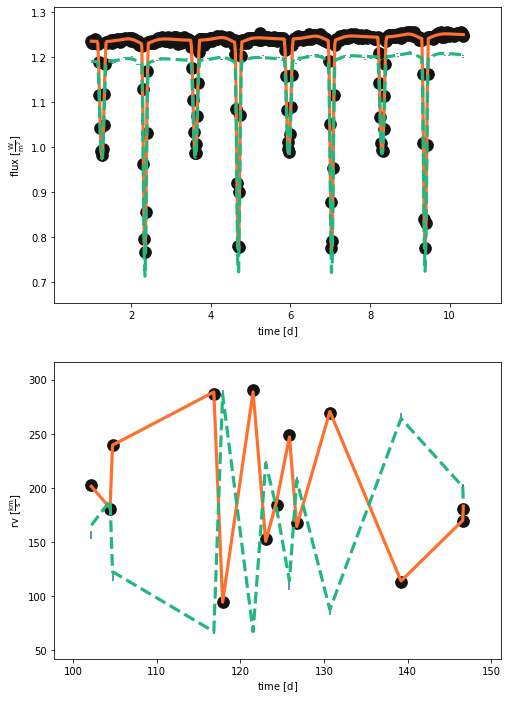

(<autofig.figure.Figure | 2 axes | 8 call(s)>,
 <Figure size 576x864 with 2 Axes>)

In [12]:
b.plot(['dataset', 'model'], model='init_gps', show=True)

In [13]:
b.add_solver('sampler.emcee', solver='mcmc_gps',
              init_from=['sample_init'],
              priors=['upriors',], 
              compute='phoebe01', nwalkers=96, niters=5000, progress_every_niters=10)

<ParameterSet: 17 parameters | qualifiers: burnin_factor, continue_from, priors, compute, nwalkers, comments, niters, nlags_factor, continue_from_iter, expose_failed, progress_every_niters, use_server, init_from_requires, thin_factor, init_from, priors_combine, init_from_combine>

In [14]:
b.run_solver(solver='mcmc_gps', use_server='terra', solution = 'mcmc_gps_solution', detach=True)

# crimpl: ssh terra "ls -d ~/crimpl/crimpl-job-*"
# crimpl: ssh terra "ls -d ~/crimpl/crimpl-job-*"
# crimpl: ssh terra "pwd"
# crimpl: ssh terra "ls /home/users/angela/crimpl/crimpl-job-2022.05.15-20.15.12/*"
# crimpl: ssh terra "source ~/crimpl/exportpath.sh; conda -V"
# crimpl: ssh terra "source ~/crimpl/exportpath.sh; conda info --envs"
# crimpl: ssh terra "ls -d ~/crimpl/crimpl-envs/*"
# crimpl: ssh terra "ls -d ~/crimpl/crimpl-job-2022.05.15-20.15.12/crimpl-envs/*"
# crimpl: ssh terra "source ~/crimpl/exportpath.sh; mkdir -p /home/users/angela/crimpl/crimpl-job-2022.05.15-20.15.12"
# crimpl: scp crimpl_submit_script.sh /Users/angela/Documents/WORK/PHOETTING/phoetting-paper/FINAL_NOTEBOOKS_RESULTS/_BHfoNzfwIITwDhafQZaMDDoRGUNQhw.py terra:/home/users/angela/crimpl/crimpl-job-2022.05.15-20.15.12/
# crimpl: ssh terra "source ~/crimpl/exportpath.sh; echo '_BHfoNzfwIITwDhafQZaMDDoRGUNQhw.py' >> /home/users/angela/crimpl/crimpl-job-2022.05.15-20.15.12/crimpl-input-files.list"
# crimpl: 

<Parameter: detached_job=unknown | keys: description, value, job_name, uniqueid, readonly, advanced, latexfmt>

In [15]:
b.save('bundles/mcmc_gps_rq.bundle')

'bundles/mcmc_gps_rq.bundle'

# Detrended

In [22]:
b = phoebe.load('bundles/pre_gps.bundle')

In [23]:
lcV = np.loadtxt('data/lc.V.data.dtr.rq')
lcB = np.loadtxt('data/lc.B.data.dtr.rq')

In [24]:
b['fluxes@dataset@lc01'] = lcV[:,1]
b['fluxes@dataset@lc02'] = lcB[:,1]

In [25]:
b.add_solver('sampler.emcee', solver='mcmc_gps',
              init_from=['sample_init',],
              priors=['upriors',], 
              compute='phoebe01', nwalkers=96, niters=5000, progress_every_niters=10)

<ParameterSet: 17 parameters | qualifiers: burnin_factor, continue_from, priors, compute, nwalkers, comments, niters, nlags_factor, continue_from_iter, expose_failed, progress_every_niters, use_server, init_from_requires, thin_factor, init_from, priors_combine, init_from_combine>

In [26]:
b.run_solver(solver='mcmc_gps', use_server='terra', solution = 'mcmc_gps_solution', detach=True)

# crimpl: ssh terra "ls -d ~/crimpl/crimpl-job-*"
# crimpl: ssh terra "ls -d ~/crimpl/crimpl-job-*"
# crimpl: ssh terra "pwd"
# crimpl: ssh terra "ls /home/users/angela/crimpl/crimpl-job-2022.05.15-20.16.50/*"
# crimpl: ssh terra "source ~/crimpl/exportpath.sh; conda -V"
# crimpl: ssh terra "source ~/crimpl/exportpath.sh; conda info --envs"
# crimpl: ssh terra "ls -d ~/crimpl/crimpl-envs/*"
# crimpl: ssh terra "ls -d ~/crimpl/crimpl-job-2022.05.15-20.16.50/crimpl-envs/*"
# crimpl: ssh terra "source ~/crimpl/exportpath.sh; mkdir -p /home/users/angela/crimpl/crimpl-job-2022.05.15-20.16.50"
# crimpl: scp crimpl_submit_script.sh /Users/angela/Documents/WORK/PHOETTING/phoetting-paper/FINAL_NOTEBOOKS_RESULTS/_vjtZPGIuVExHaXVXQprMxpiuDDFXVz.py terra:/home/users/angela/crimpl/crimpl-job-2022.05.15-20.16.50/
# crimpl: ssh terra "source ~/crimpl/exportpath.sh; echo '_vjtZPGIuVExHaXVXQprMxpiuDDFXVz.py' >> /home/users/angela/crimpl/crimpl-job-2022.05.15-20.16.50/crimpl-input-files.list"
# crimpl: 

<Parameter: detached_job=unknown | keys: description, value, job_name, uniqueid, readonly, advanced, latexfmt>

In [27]:
b.save('bundles/mcmc_gps_dtr.bundle')

'bundles/mcmc_gps_dtr.bundle'

# RESULTS

In [94]:
import numpy as np
import matplotlib.pyplot as plt
import phoebe
# phoebe.interactive_checks_off()
# phoebe.interactive_constraints_off()
# phoebe.multiprocessing_on()
# phoebe.mpi_off()
%matplotlib inline

In [95]:
def load_progress_and_resubmit(file, solution='', kill=False, resubmit=False):
    b = phoebe.load(file)
    b.load_job_progress(solution=solution)
    if kill:
        b.kill_job(solution=solution)
    if resubmit:
        b.resubmit_job(solution=solution)
    # b.plot('mcmc_gps_solution', style='lnprobability', show=True)
    return b

def adopt_solution_and_plot(b, burnin=0, lnprob_cutoff=-np.inf, solution='', model=''):
    b.adopt_solution(solution, burnin=burnin, lnprob_cutoff=lnprob_cutoff)
    b.run_compute(use_server='terra', model=model, overwrite=True)
    %matplotlib inline
    b.plot('lc', model=model, m='.', s=0.01, show=True)
    b.plot('lc', model=model, y='residuals', m='o', s=0.01, show=True)
    return b

def plot_distributions(b, burnin=0, lnprob_cutoff=-np.inf, label_fig='', solution=''):
    phoebe_c = {'black': "#131313",
                     'blue': "#2B71B1",
                     'orange': "#FF702F",
                     'green': "#22B77F",
                     'red': '#F92E3D',
                     'purple': '#6D2EB8',
                     'pink': "#ED3170",
                     'yellow': "#FFCD2F"}
    
    labels = ['$i$', '$T_2/T_1$', '$r_2/r_1$', '$r_1+r_2$', '$e\sin\omega$', '$e\cos\omega$', 
              '$q$', '$a\sin i$', '$v_{\gamma}$', '$T_{\mathrm{eff},1}$', '$L_{\mathrm{pb},V}$', '$L_{\mathrm{pb},B}$',
             '$P$', '$t_0$', r'$\beta_1$', r'$\beta_2$', '$A_1$', '$A_2$']
    twigs = ['incl@binary', 'teffratio', 'requivratio', 'requivsumfrac', 'esinw', 'ecosw', 
                  'q', 'asini@binary', 'vgamma', 'teff@primary', 'pblum@primary@lc01', 'pblum@primary@lc02',
             'period@binary', 't0_supconj@binary',
            'gravb_bol@primary', 'gravb_bol@secondary', 'irrad_frac_refl_bol@primary', 'irrad_frac_refl_bol@secondary']
    
    sma = 9.435
    r1 = 1.473
    r2 = 0.937
    incl = 87.35
    period = 2.345678901
    q = 0.888
    teff1 = 6342.
    teff2 = 5684.
    t0 = 1.23456789+1.25
    ecc = 0.148
    per0 = 65.5
    vgamma = 185.5
    pblum1 = 12.566370614359172
    pblum2 = 12.566370614359172
    period = 2.345678901
    t0 = 2.345678901
    beta1 = 0.32
    beta2 = 0.32
    alb1 = 0.6
    alb2 = 0.6

    truths = [incl, teff2/teff1, r2/r1, (r1+r2)/sma, ecc*np.sin(per0/180*np.pi), ecc*np.cos(per0/180*np.pi),
             q, sma*np.sin(incl/180*np.pi), vgamma, teff1, pblum1, pblum2, period, t0, beta1, beta2, alb1, alb2]
    
    
    fig, axes = plt.subplots(nrows=3, ncols=6, figsize=(12,6))

    i=0
    for twig, label, truth in zip(twigs, labels, truths):
        dist_gps = b.get_distribution_collection(solution=solution, parameters=[twig], burnin = burnin, lnprob_cutoff=lnprob_cutoff)
        if i == 0:
            axes.flatten()[i].hist(dist_gps[0].sample(1000), histtype='stepfilled', zorder=1, alpha=0.5, lw=1.5, color=phoebe_c['green'], label=label_fig)
            axes.flatten()[i].axvline(x=truth, ls='--', lw=2, c=phoebe_c['black'], label='True value')
        elif i==10 or i==11:       
            axes.flatten()[i].hist(dist_gps[0].sample(1000), histtype='stepfilled', zorder=1, alpha=0.5, lw=1.5, color=phoebe_c['green'])
            axes.flatten()[i].axvline(x=truth, ls='--', lw=2, c=phoebe_c['black'])
        else:
            axes.flatten()[i].hist(dist_gps[0].sample(1000), histtype='stepfilled', zorder=1, alpha=0.5, lw=1.5, color=phoebe_c['green'])
            axes.flatten()[i].axvline(x=truth, ls='--', lw=2, c=phoebe_c['black'])

        axes.flatten()[i].set_xlabel(label)

        i+=1

    fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
              ncol=4, fancybox=True, frameon=True)
    fig.tight_layout()
    return fig

In [112]:
bfile = 'bundles/mcmc_gps_dprbf.bundle'
sol = 'mcmc_gps_solution'

In [113]:
b = load_progress_and_resubmit(bfile, solution=sol, kill=False, resubmit=False)

# crimpl: ssh terra "ls -d ~/crimpl/crimpl-job-*"
# crimpl: ssh terra "ls -d ~/crimpl/crimpl-job-*"
# crimpl: ssh terra "pwd"
# crimpl: ssh terra "cat /home/users/angela/crimpl/crimpl-job-2022.05.15-20.12.04/crimpl_slurm_id"
# crimpl: ssh terra "squeue -j 3988"
# crimpl: ssh terra "ls /home/users/angela/crimpl/crimpl-job-2022.05.15-20.12.04/*"
# crimpl: ssh terra "ls /home/users/angela/crimpl/crimpl-job-2022.05.15-20.12.04/*"
# crimpl: scp terra:/home/users/angela/crimpl/crimpl-job-2022.05.15-20.12.04/_QoWmauRQBuxgHrQlxIAPfHzuCyFGQG.out.progress ./


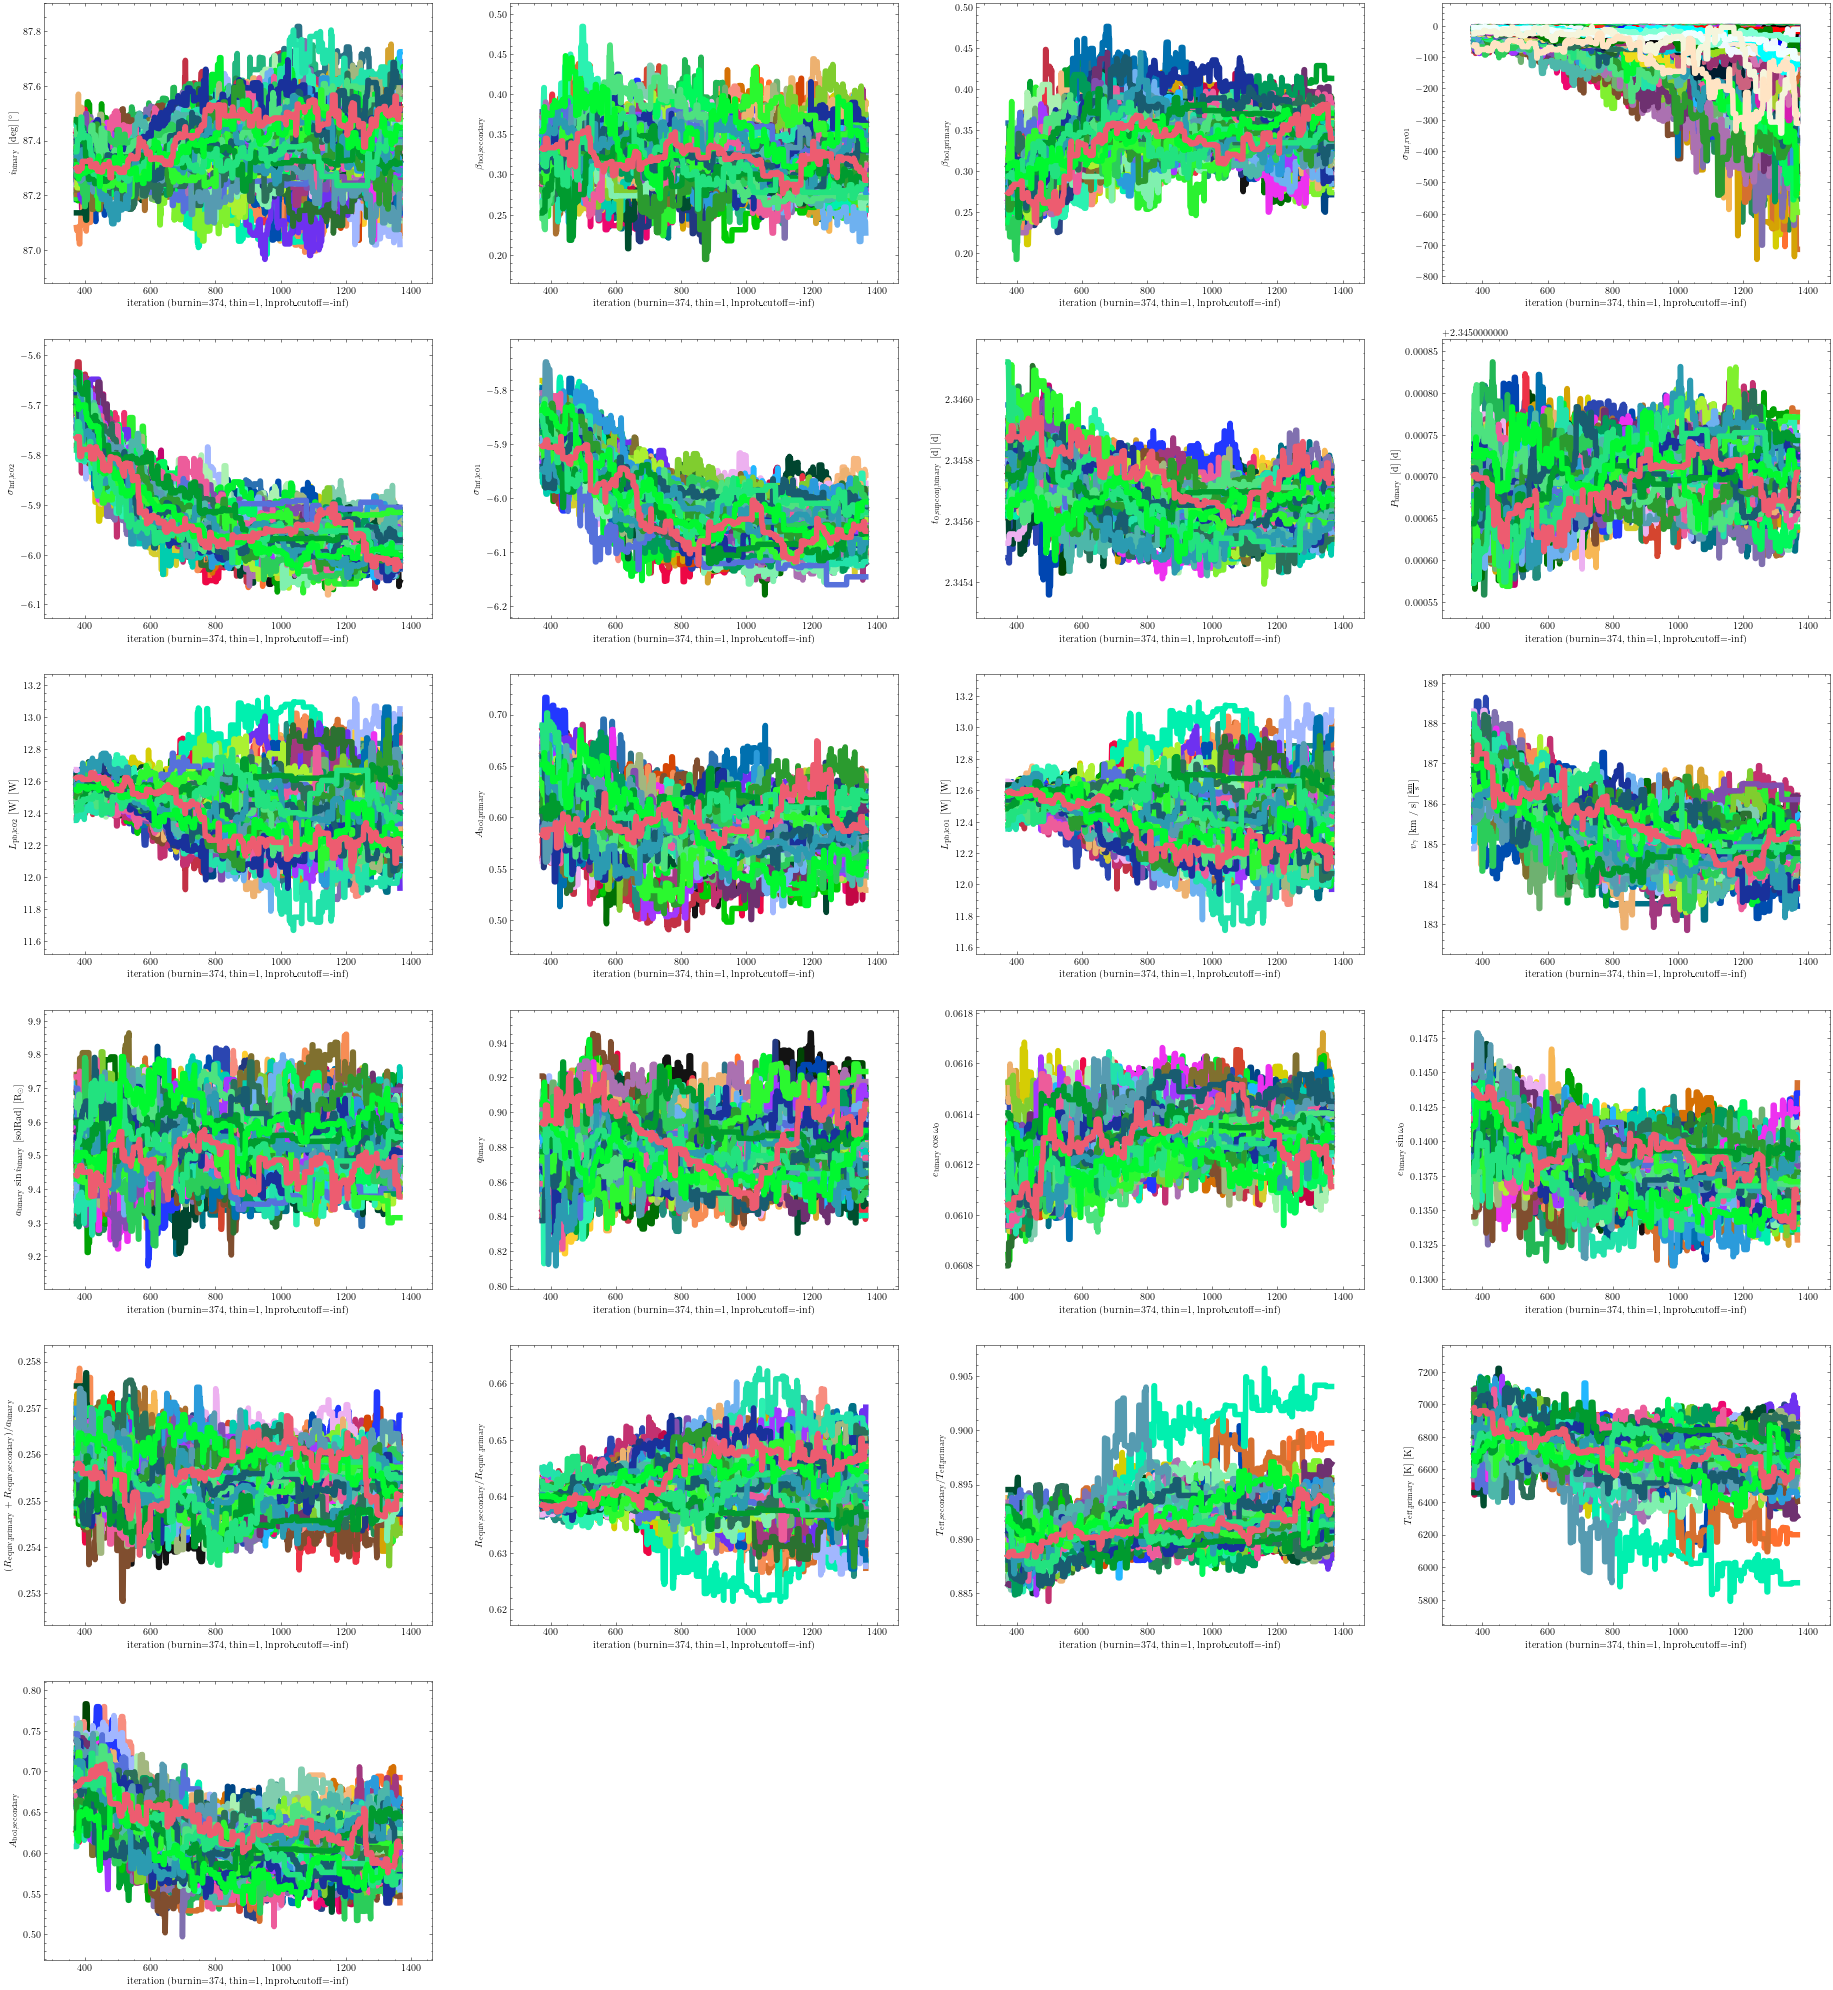

(<autofig.figure.Figure | 21 axes | 2112 call(s)>,
 <Figure size 2304x2592 with 21 Axes>)

In [98]:
%matplotlib inline 
b.plot(sol, style='trace', s=0.01, show=True)

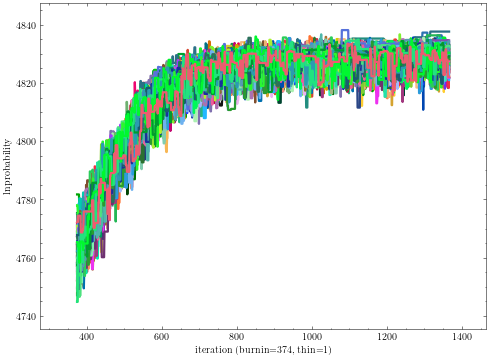

(<autofig.figure.Figure | 1 axes | 96 call(s)>,
 <Figure size 576x432 with 1 Axes>)

In [99]:
%matplotlib inline
b.plot(sol, style='lnprobability', show=True)

In [100]:
import pickle
with open('../data/testcase/true_population.pickle', 'rb') as f:
    pop = pickle.load(f)

In [101]:
pop['pblum@primary@lc01'] = pop['pblum@primary@lcV']

In [102]:
pop['pblum@primary@lc02'] = pop['pblum@primary@lcB']

In [103]:
colors = []
colors.append('#000000')

import cmasher as cmr
colors.extend(cmr.take_cmap_colors('cmr.pride', 2, cmap_range=(0.2, 0.4), return_fmt='hex'))
colors.extend(cmr.take_cmap_colors('cmr.rainforest', 1, cmap_range=(0.3, 0.3), return_fmt='hex'))

In [104]:
from utils import *
truths, twigs, labels = get_truths_labels()

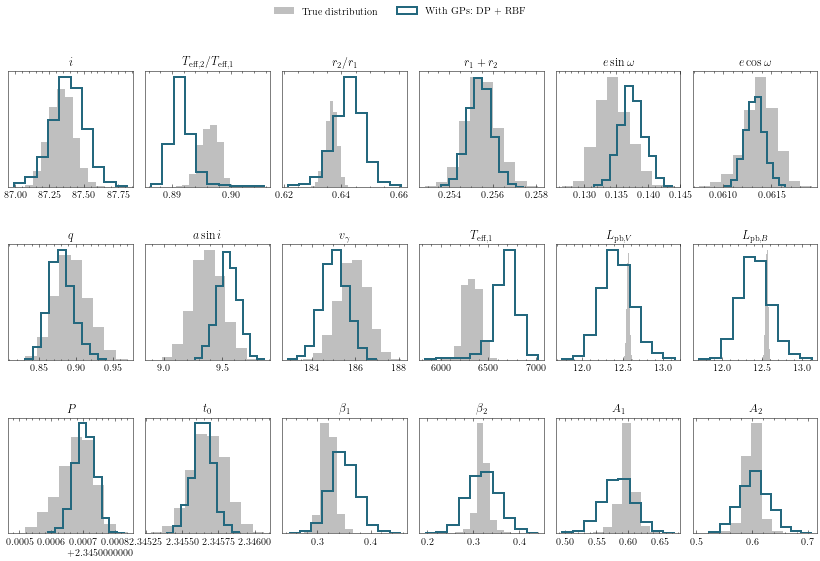

In [114]:
# fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(7.25,5))
plt.style.use('science')
fig, axes = plt.subplots(nrows=3, ncols=6, figsize=(7.25*2,4.25*2), gridspec_kw={'hspace': 0.5, 'wspace': 0.1})
# fig2, axes2 = plt.subplots(nrows=4, ncols=4, figsize=(7.25,7.25), gridspec_kw={'hspace': 0.5, 'wspace': 0.1})

i=0
density_plot = False
for twig, label, truth in zip(twigs, labels, truths):
    dist_noise = b.get_distribution_collection(solution='mcmc_gps_solution', parameters=[twig], burnin=700, lnprob_cutoff=-np.inf,)
    
    if i == 0:
        axes.flatten()[i].hist(pop[twig], histtype='stepfilled', zorder=1, alpha=0.25, lw=1.5, color=colors[0], label='True distribution', density=density_plot)
        axes.flatten()[i].hist(dist_noise[0].sample(10000), histtype='step', zorder=2, alpha=1, lw=2, color=colors[1], label='With GPs: DP + RBF', density=density_plot)
        # axes.flatten()[i].axvline(x=truth, ls='--', lw=2, c=phoebe_c['black'], zorder=3, label='True value')
        # axes.flatten()[i].axvline(x=de2, ls=':', lw=2, c=phoebe_c['red'], zorder=3, label='DE: V,B value')
    elif i>=10:
        axes.flatten()[i].hist(pop[twig], histtype='stepfilled', zorder=1, alpha=0.25, lw=1.5, color=colors[0], density=density_plot)
        axes.flatten()[i].hist(dist_noise[0].sample(10000), histtype='step', zorder=2, alpha=1, lw=2, color=colors[1], density=density_plot)
        # axes.flatten()[i].axvline(x=truth, ls='--', lw=2, c=phoebe_c['black'], zorder=3)
        # axes.flatten()[i].axvline(x=de2, ls=':', lw=2, c=phoebe_c['red'], zorder=4)
    else:
        axes.flatten()[i].hist(pop[twig], histtype='stepfilled', zorder=1, alpha=0.25, lw=1.5, color=colors[0], density=density_plot)
        axes.flatten()[i].hist(dist_noise[0].sample(10000), histtype='step', zorder=2, alpha=1, lw=2, color=colors[1], density=density_plot)
        # axes.flatten()[i].axvline(x=truth, ls='--', lw=2, c=phoebe_c['black'], zorder=3)
        # axes.flatten()[i].axvline(x=de2, ls=':', lw=2, c=phoebe_c['red'], zorder=4)

    axes.flatten()[i].set_title(label)
    axes.flatten()[i].set_yticks([])

    i+=1
# axes.flatten()[-1].axis('off')
# axes.flatten()[-2].axis('off')
fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.0),
          ncol=4, fancybox=True, frameon=False)
# fig.tight_layout()
# fig.savefig('fig5-samplers_marg_dists.pdf', rasterized=True)
# fig.savefig('figs/6_samplers_marginalization.pdf', dpi=300)
# fig2.savefig('figs/7_samplers_noisenuisance.pdf', dpi=300)

In [38]:
# %matplotlib inline
# fig = plot_distributions(b, burnin=700, label_fig='DP + RBF', solution=sol)

# crimpl: ssh terra "ls -d ~/crimpl/crimpl-job-*"
# crimpl: ssh terra "ls -d ~/crimpl/crimpl-job-*"
# crimpl: ssh terra "pwd"
# crimpl: ssh terra "ls /home/users/angela/crimpl/crimpl-job-2022.05.23-15.52.58/*"
# crimpl: ssh terra "source ~/crimpl/exportpath.sh; conda -V"
# crimpl: ssh terra "source ~/crimpl/exportpath.sh; conda info --envs"
# crimpl: ssh terra "ls -d ~/crimpl/crimpl-envs/*"
# crimpl: ssh terra "ls -d ~/crimpl/crimpl-job-2022.05.23-15.52.58/crimpl-envs/*"
# crimpl: ssh terra "source ~/crimpl/exportpath.sh; mkdir -p /home/users/angela/crimpl/crimpl-job-2022.05.23-15.52.58"
# crimpl: scp crimpl_submit_script.sh /Users/angela/Documents/WORK/PHOETTING/phoetting-paper/FINAL_NOTEBOOKS_RESULTS/_faCblMjfvzcDGMKReMHLGTeOETIzHq.py terra:/home/users/angela/crimpl/crimpl-job-2022.05.23-15.52.58/
# crimpl: ssh terra "source ~/crimpl/exportpath.sh; echo '_faCblMjfvzcDGMKReMHLGTeOETIzHq.py' >> /home/users/angela/crimpl/crimpl-job-2022.05.23-15.52.58/crimpl-input-files.list"
# crimpl: 

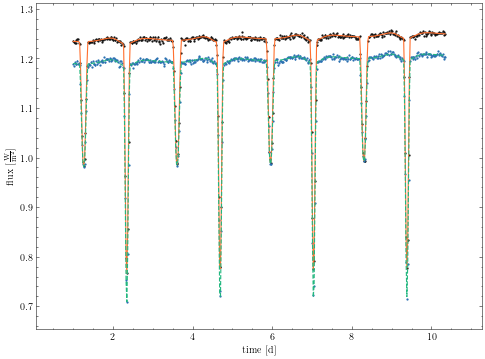

/Users/angela/miniconda3/envs/phoebe_2.4/lib/python3.9/site-packages/phoebe/dependencies/autofig/call.py:1305: UserWarning: You passed a edgecolor/edgecolors ('none') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  artist = ax.scatter(*datapoint,
/Users/angela/miniconda3/envs/phoebe_2.4/lib/python3.9/site-packages/phoebe/dependencies/autofig/call.py:1305: UserWarning: You passed a edgecolor/edgecolors ('none') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  artist = ax.scatter(*datapoint,


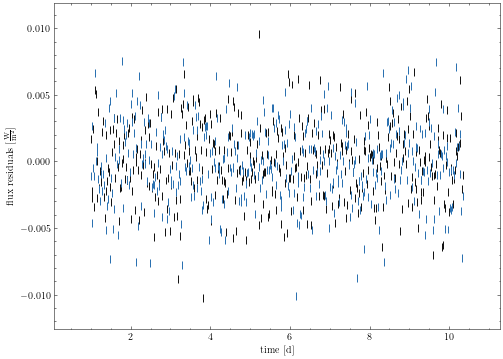

In [39]:
b = adopt_solution_and_plot(b, burnin=700, solution=sol, model='mcmc_model')

In [40]:
b.save('bundles/mcmc_gps_dprbf_results.bundle')

'bundles/mcmc_gps_dprbf_results.bundle'

### True noise model comparison with GPs

In [42]:
t = b.get_value('times', dataset='lc01', context='dataset')

In [49]:
noise = 0.006 * np.exp( 0.4 + (t-t[0])/(t[-1]-t[0]) ) - 0.002*(t-t[0])**2/(t[-1]-t[0])**2 + 0.001*(t-t[0])/(t[-1]-t[0]) + 0.0002
noise -= np.mean(noise)

In [54]:
gps_model_dprbf = b.get_value('gps', dataset='lc01', context='model', model='mcmc_model')

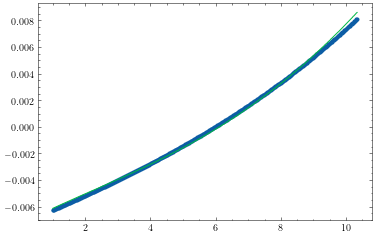

In [56]:
plt.plot(t, noise-np.mean(noise), '.')
plt.plot(t, gps_model_dprbf-np.mean(gps_model_dprbf), '-')

# With GPs - RQ

In [115]:
bfile = 'bundles/mcmc_gps_rq.bundle'
sol = 'mcmc_gps_solution'

In [117]:
b = load_progress_and_resubmit(bfile, solution=sol, kill=False, resubmit=False)

# crimpl: ssh terra "ls -d ~/crimpl/crimpl-job-*"
# crimpl: ssh terra "ls -d ~/crimpl/crimpl-job-*"
# crimpl: ssh terra "pwd"
# crimpl: ssh terra "cat /home/users/angela/crimpl/crimpl-job-2022.05.15-20.15.12/crimpl_slurm_id"
# crimpl: ssh terra "squeue -j 3990"
# crimpl: ssh terra "ls /home/users/angela/crimpl/crimpl-job-2022.05.15-20.15.12/*"
# crimpl: ssh terra "ls /home/users/angela/crimpl/crimpl-job-2022.05.15-20.15.12/*"
# crimpl: scp terra:/home/users/angela/crimpl/crimpl-job-2022.05.15-20.15.12/_BHfoNzfwIITwDhafQZaMDDoRGUNQhw.out.progress ./


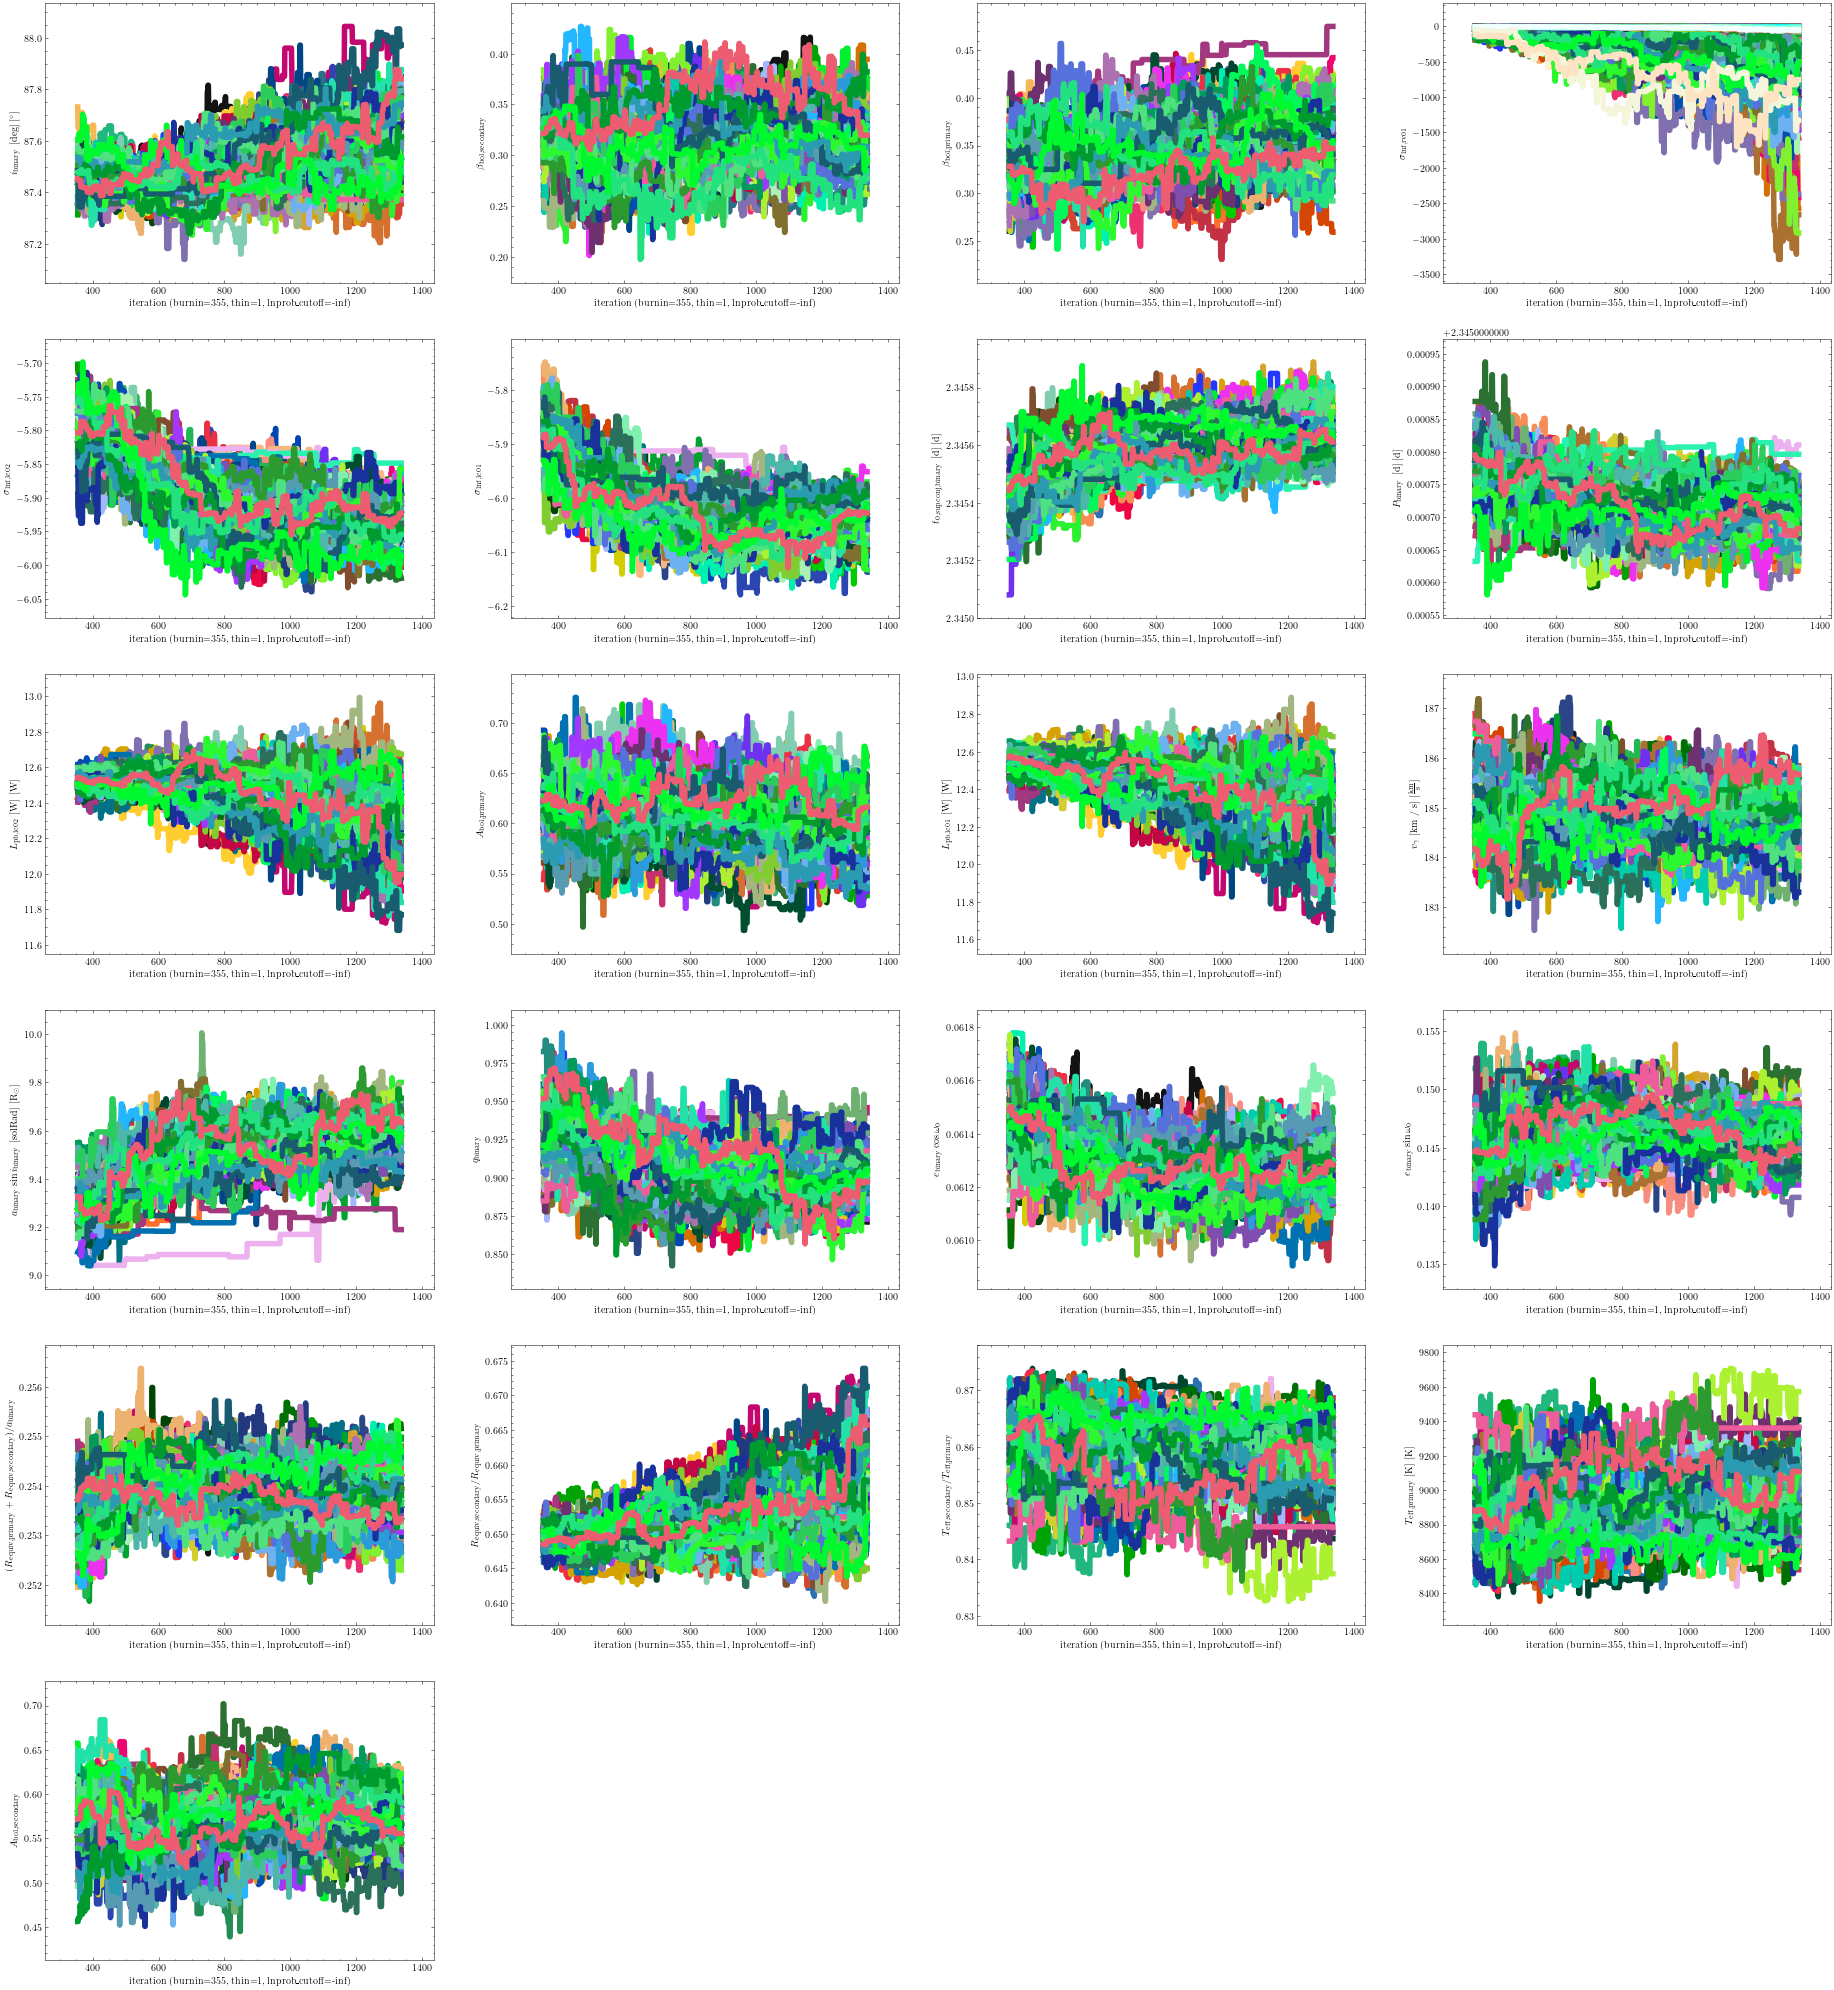

(<autofig.figure.Figure | 21 axes | 2112 call(s)>,
 <Figure size 2304x2592 with 21 Axes>)

In [108]:
%matplotlib inline 
b.plot(sol, style='trace', s=0.01, show=True)

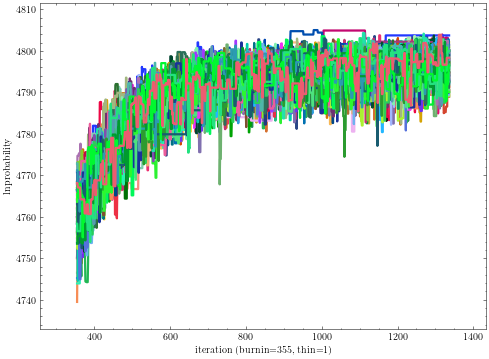

(<autofig.figure.Figure | 1 axes | 96 call(s)>,
 <Figure size 576x432 with 1 Axes>)

In [109]:
%matplotlib inline
b.plot(sol, style='lnprobability', show=True)

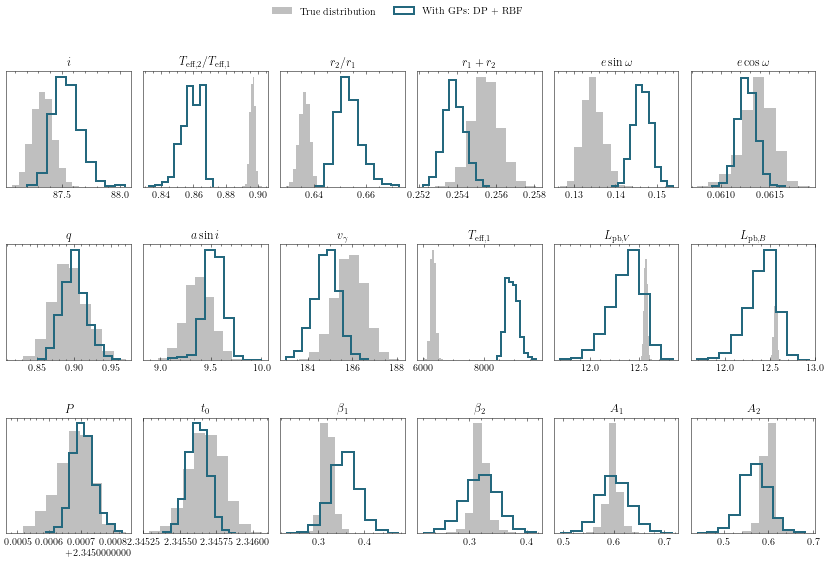

In [118]:
# fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(7.25,5))
plt.style.use('science')
fig, axes = plt.subplots(nrows=3, ncols=6, figsize=(7.25*2,4.25*2), gridspec_kw={'hspace': 0.5, 'wspace': 0.1})
# fig2, axes2 = plt.subplots(nrows=4, ncols=4, figsize=(7.25,7.25), gridspec_kw={'hspace': 0.5, 'wspace': 0.1})

i=0
density_plot = False
for twig, label, truth in zip(twigs, labels, truths):
    dist_noise = b.get_distribution_collection(solution='mcmc_gps_solution', parameters=[twig], burnin=700, lnprob_cutoff=-np.inf,)
    
    if i == 0:
        axes.flatten()[i].hist(pop[twig], histtype='stepfilled', zorder=1, alpha=0.25, lw=1.5, color=colors[0], label='True distribution', density=density_plot)
        axes.flatten()[i].hist(dist_noise[0].sample(10000), histtype='step', zorder=2, alpha=1, lw=2, color=colors[1], label='With GPs: DP + RBF', density=density_plot)
        # axes.flatten()[i].axvline(x=truth, ls='--', lw=2, c=phoebe_c['black'], zorder=3, label='True value')
        # axes.flatten()[i].axvline(x=de2, ls=':', lw=2, c=phoebe_c['red'], zorder=3, label='DE: V,B value')
    elif i>=10:
        axes.flatten()[i].hist(pop[twig], histtype='stepfilled', zorder=1, alpha=0.25, lw=1.5, color=colors[0], density=density_plot)
        axes.flatten()[i].hist(dist_noise[0].sample(10000), histtype='step', zorder=2, alpha=1, lw=2, color=colors[1], density=density_plot)
        # axes.flatten()[i].axvline(x=truth, ls='--', lw=2, c=phoebe_c['black'], zorder=3)
        # axes.flatten()[i].axvline(x=de2, ls=':', lw=2, c=phoebe_c['red'], zorder=4)
    else:
        axes.flatten()[i].hist(pop[twig], histtype='stepfilled', zorder=1, alpha=0.25, lw=1.5, color=colors[0], density=density_plot)
        axes.flatten()[i].hist(dist_noise[0].sample(10000), histtype='step', zorder=2, alpha=1, lw=2, color=colors[1], density=density_plot)
        # axes.flatten()[i].axvline(x=truth, ls='--', lw=2, c=phoebe_c['black'], zorder=3)
        # axes.flatten()[i].axvline(x=de2, ls=':', lw=2, c=phoebe_c['red'], zorder=4)

    axes.flatten()[i].set_title(label)
    axes.flatten()[i].set_yticks([])

    i+=1
# axes.flatten()[-1].axis('off')
# axes.flatten()[-2].axis('off')
fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.0),
          ncol=4, fancybox=True, frameon=False)
# fig.tight_layout()
# fig.savefig('fig5-samplers_marg_dists.pdf', rasterized=True)
# fig.savefig('figs/6_samplers_marginalization.pdf', dpi=300)
# fig2.savefig('figs/7_samplers_noisenuisance.pdf', dpi=300)

In [63]:
# %matplotlib inline
# fig = plot_distributions(b, burnin=700, label_fig='RQ', solution=sol)

In [67]:
# b = adopt_solution_and_plot(b, burnin=700, solution=sol, model='mcmc_model2')

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 472/472 [35:59<00:00,  4.58s/it]


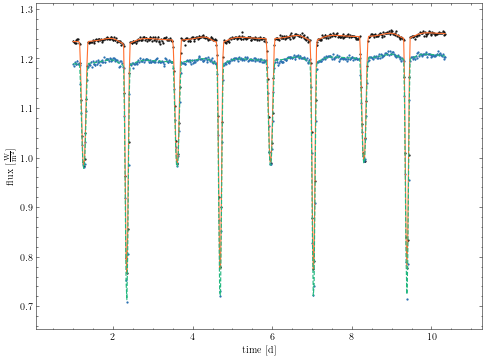

/Users/angela/miniconda3/envs/phoebe_2.4/lib/python3.9/site-packages/phoebe/dependencies/autofig/call.py:1305: UserWarning: You passed a edgecolor/edgecolors ('none') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  artist = ax.scatter(*datapoint,
/Users/angela/miniconda3/envs/phoebe_2.4/lib/python3.9/site-packages/phoebe/dependencies/autofig/call.py:1305: UserWarning: You passed a edgecolor/edgecolors ('none') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  artist = ax.scatter(*datapoint,


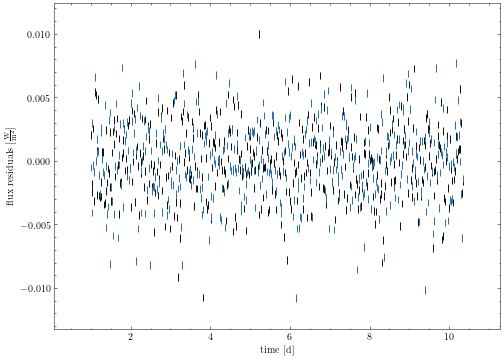

(<autofig.figure.Figure | 1 axes | 2 call(s)>,
 <Figure size 576x432 with 1 Axes>)

In [69]:
b.adopt_solution('mcmc_gps_solution', burnin=700)
b.run_compute(model='mcmc_model_loc', overwrite=True)
%matplotlib inline
b.plot('lc', model='mcmc_model_loc', m='.', s=0.01, show=True)
b.plot('lc', model='mcmc_model_loc', y='residuals', m='o', s=0.01, show=True)

In [86]:
%matplotlib qt
b.plot('lc',x='phase', model='mcmc_model_loc', m='.', s=0.01, show=True)

(<autofig.figure.Figure | 1 axes | 4 call(s)>,
 <Figure size 1152x864 with 1 Axes>)

In [70]:
gps_model_rq = b.get_value('gps', dataset='lc01', context='model', model='mcmc_model_loc')

In [ ]:
def remove_eclipses(times, residuals, sigmas, t0, period, phases1, phases2):
    # determine extent of data wrt t0
    i0 = int((t0 - min(times))/period)-1
    i1 = int((max(times-t0))/period)+1
    
    times_new = times
    residuals_new = residuals
    sigmas_new = sigmas
    for i in range(i0,i1+1,1):
        condition_1 = (times_new < t0+(i+phases1[0])*period) | (times_new > t0+(i+phases1[1])*period)
        times_new = times_new[condition_1]
        residuals_new = residuals_new[condition_1]
        sigmas_new = sigmas_new[condition_1]
        
        condition_2 = (times_new < t0+(i+phases2[0])*period) | (times_new > t0+(i+phases2[1])*period)
        times_new = times_new[condition_2]
        residuals_new = residuals_new[condition_2]
        sigmas_new = sigmas_new[condition_2]
        
    return times_new, residuals_new, sigmas_new

In [77]:
t0 = b.get_value('t0_supconj', context='component')
period = b.get_value('period@binary', context='component')

i0 = int((t0 - min(t))/period)-1
i1 = int((max(t-t0))/period)+1

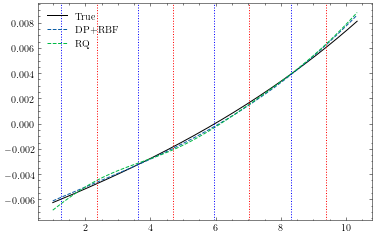

In [93]:
%matplotlib inline
plt.plot(t, noise-np.mean(noise), 'k-', label='True')
plt.plot(t, gps_model_dprbf-np.mean(gps_model_dprbf), '--', label='DP+RBF')
plt.plot(t, gps_model_rq-np.mean(gps_model_rq), '--', label='RQ')
plt.legend()
for i in range(i0+1,i1,1):
    plt.axvline(t0+i*period, c='r', ls=':')
for i in range(i0+1,i1,1):
    plt.axvline(t0+(i-0.46)*period, c='b', ls=':')
plt.show()

In [27]:
b.save('bundles/mcmc_gps_rq_results.bundle')

'data/testcase/bundles/mcmc_autogps_ess_hpfixed_results.bundle'

# Detrended

In [17]:
bfile = 'bundles/mcmc_gps_dtr.bundle'
sol = 'mcmc_gps_solution'

In [18]:
b = load_progress_and_resubmit(bfile, solution=sol, kill=True, resubmit=True)

# crimpl: ssh terra "ls -d ~/crimpl/crimpl-job-*"
# crimpl: ssh terra "ls -d ~/crimpl/crimpl-job-*"
# crimpl: ssh terra "pwd"
# crimpl: ssh terra "cat /home/users/angela/crimpl/crimpl-job-2022.05.15-20.16.50/crimpl_slurm_id"
# crimpl: ssh terra "squeue -j 3985"
# crimpl: ssh terra "cat /home/users/angela/crimpl/crimpl-job-2022.05.15-20.16.50/crimpl-job.status"
# crimpl: ssh terra "ls /home/users/angela/crimpl/crimpl-job-2022.05.15-20.16.50/*"
# crimpl: ssh terra "ls /home/users/angela/crimpl/crimpl-job-2022.05.15-20.16.50/*"
# crimpl: scp terra:/home/users/angela/crimpl/crimpl-job-2022.05.15-20.16.50/_vjtZPGIuVExHaXVXQprMxpiuDDFXVz.out.progress ./
# crimpl: ssh terra "scancel 3985"
# crimpl: ssh terra "squeue -j 3985"
# crimpl: ssh terra "cat /home/users/angela/crimpl/crimpl-job-2022.05.15-20.16.50/crimpl-job.status"
# crimpl: ssh terra "source ~/crimpl/exportpath.sh; sbatch /home/users/angela/crimpl/crimpl-job-2022.05.15-20.16.50/crimpl_submit_script.sh"
# crimpl: ssh terra "echo 3991

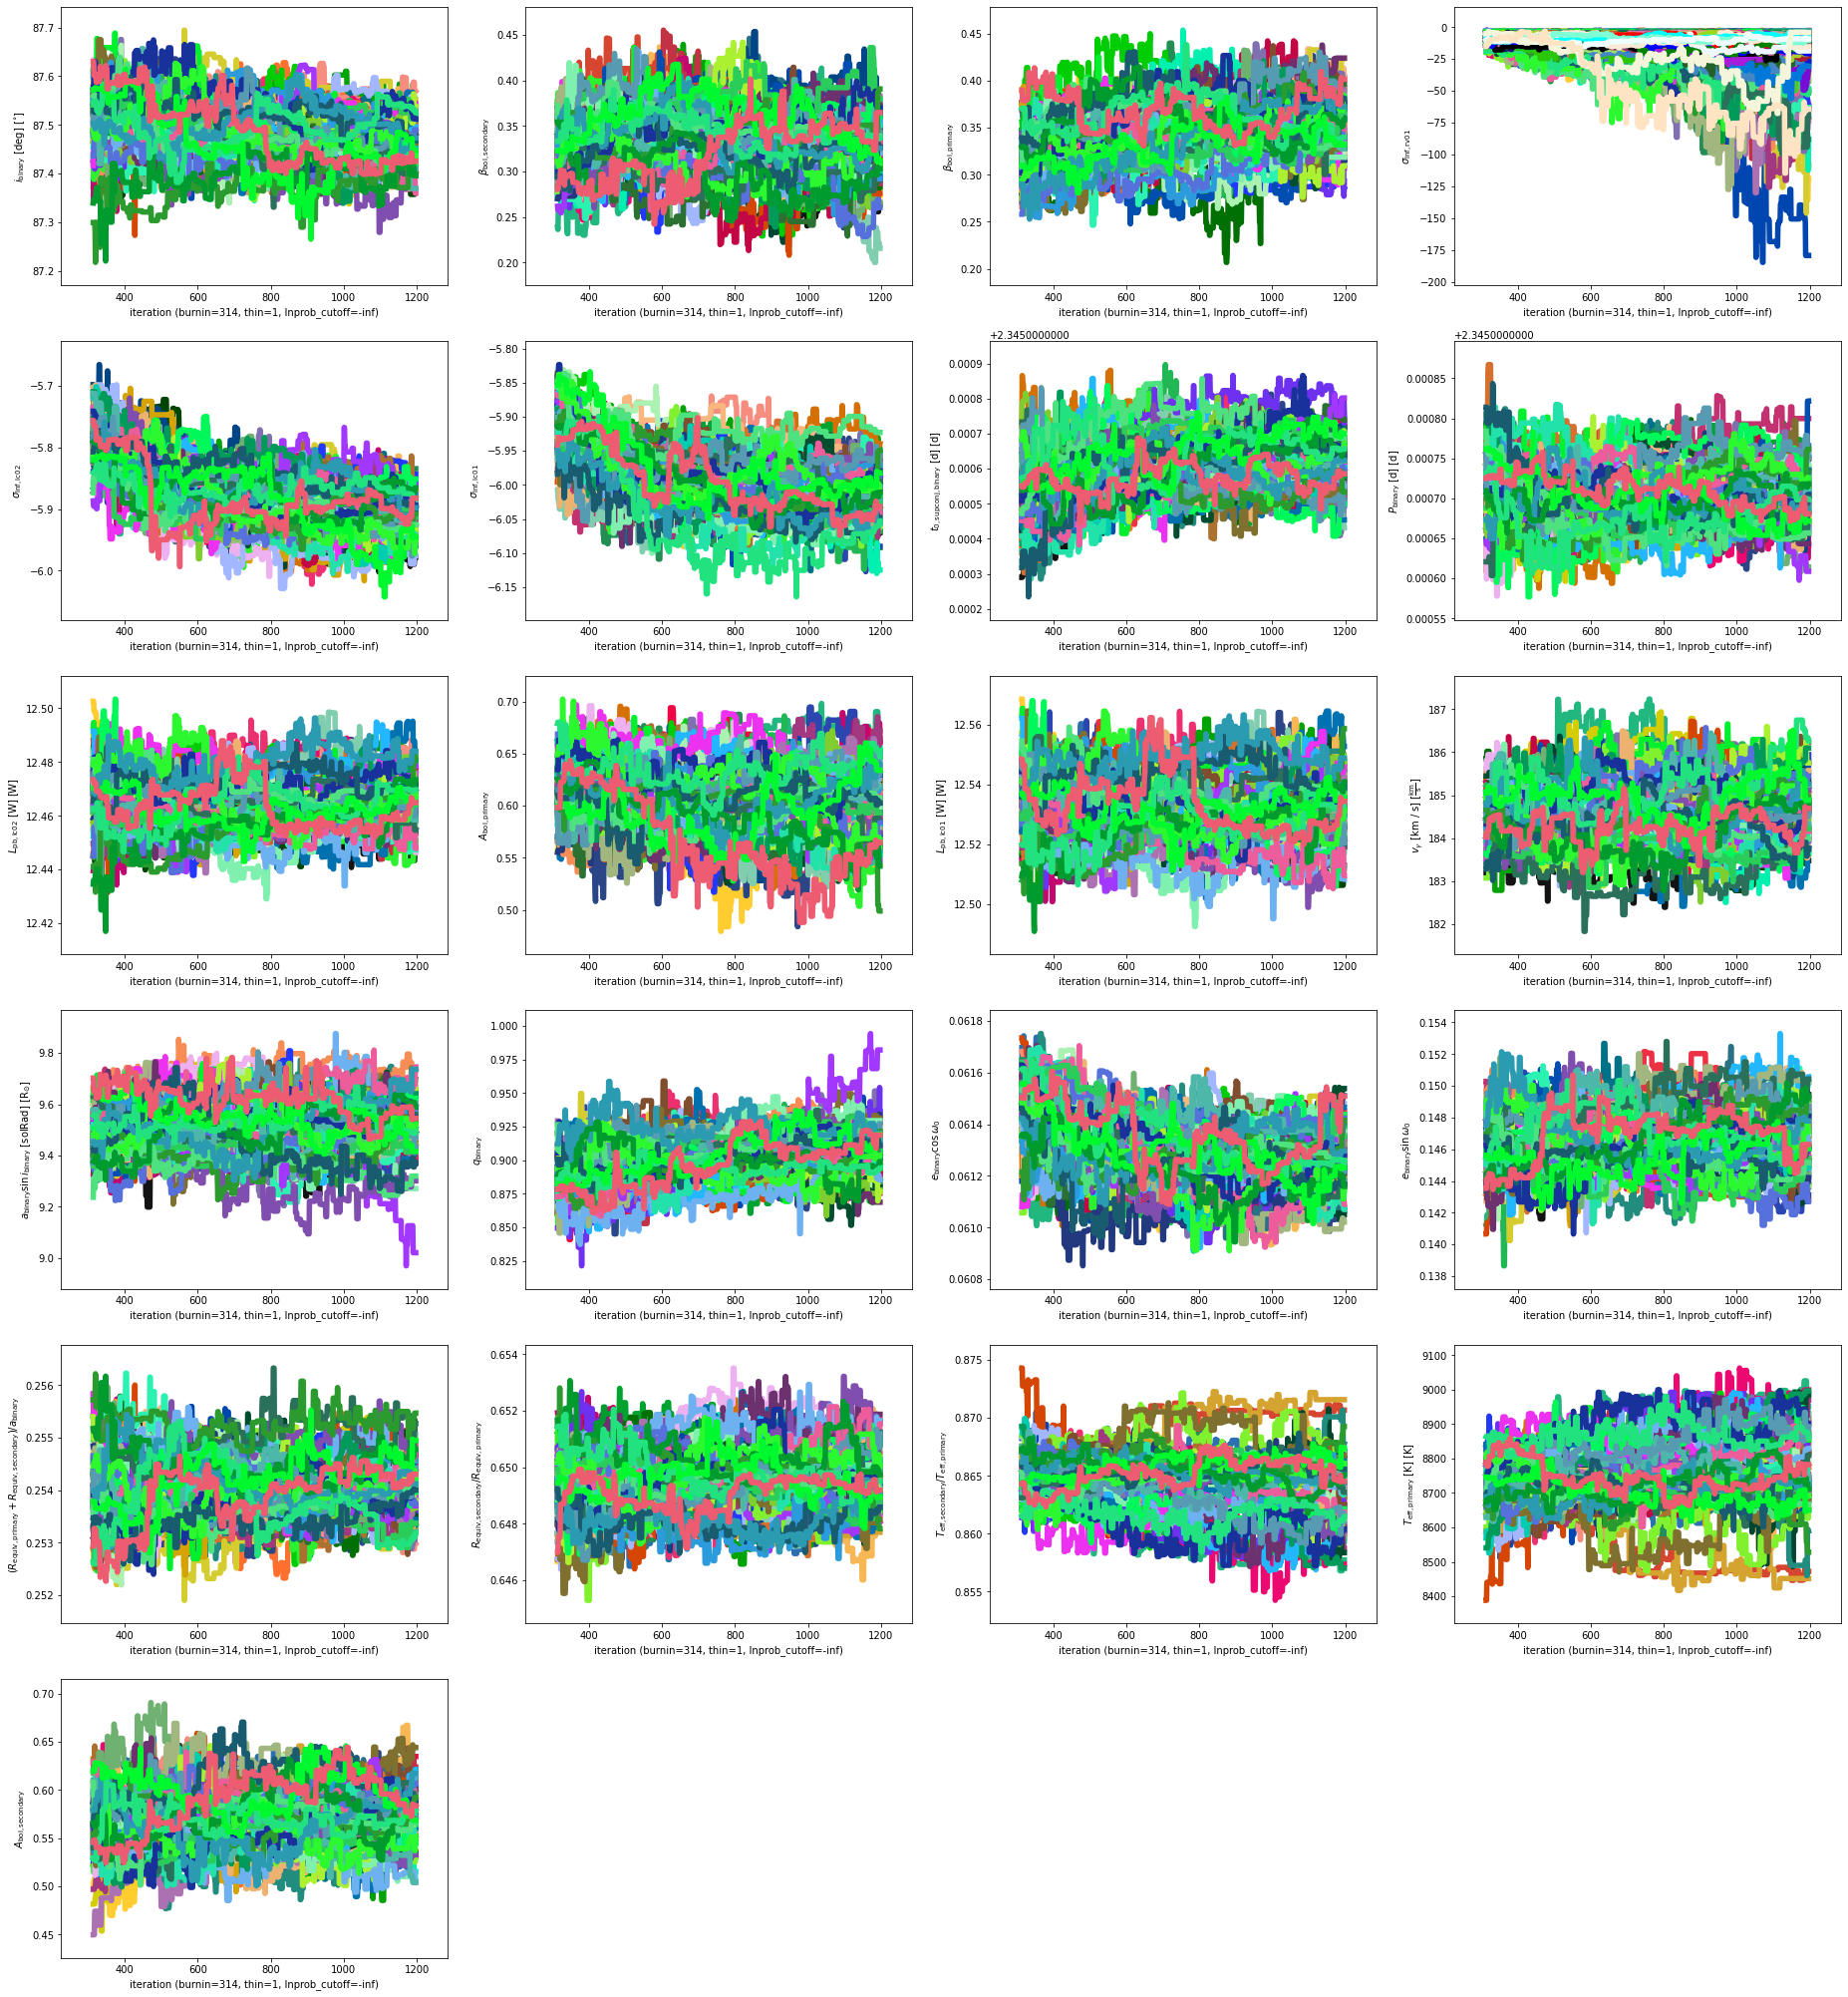

(<autofig.figure.Figure | 21 axes | 2112 call(s)>,
 <Figure size 2304x2592 with 21 Axes>)

In [19]:
%matplotlib inline 
b.plot(sol, style='trace', s=0.01, show=True)

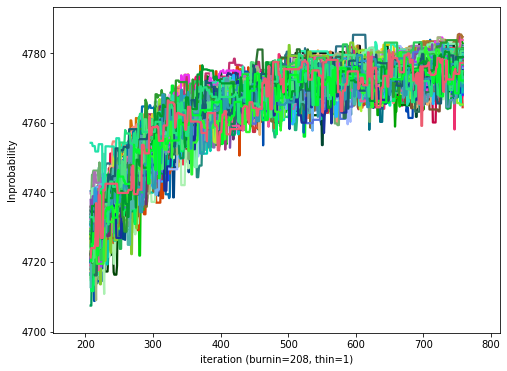

(<autofig.figure.Figure | 1 axes | 96 call(s)>,
 <Figure size 576x432 with 1 Axes>)

In [57]:
%matplotlib inline
b.plot(sol, style='lnprobability', show=True)

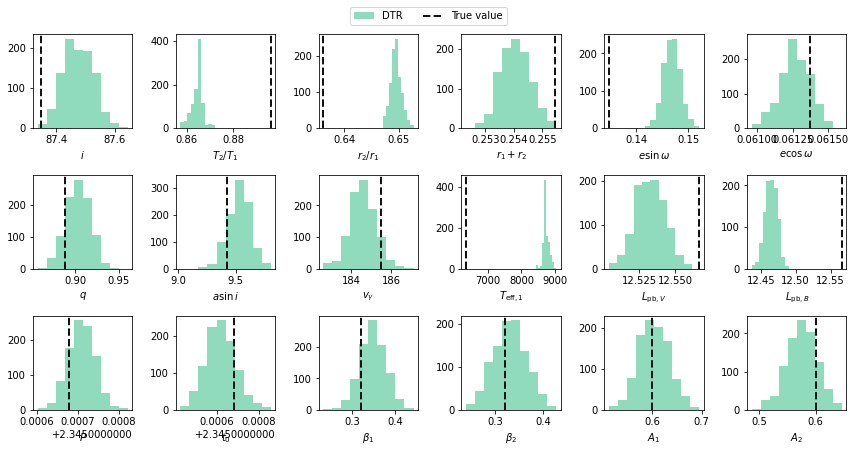

In [20]:
%matplotlib inline
fig = plot_distributions(b, burnin=600, label_fig='DTR', solution=sol)

In [40]:
b = adopt_solution_and_plot(b, burnin=2000, solution=sol, model='mcmc_model')

In [33]:
b.save('bundles/mcmc_gps_dtr_results.bundle')

'data/testcase/bundles/mcmc_autogps_dprbf_dtr_results.bundle'